# BUSINESS UNDERSTANDING AND OVERVIEW 

This dataset contains information about Udemy from 2011 until 2017. I carried out data analysis on Udemy courses from different subjects to understand where opportunities to increase revenue may lie, and track performace of courses. Apart from that we want to see the progression of one MOOC site(Massive open online course), in this case Udemy, and what are the factors involved.

# DATA COLLECTION

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
%matplotlib inline 
sns.set_style('darkgrid')
cf.go_offline()

In [21]:
df1 = pd.read_csv(r"C:\Users\Mohana Krishnan\Downloads\Machine Learning code\Dataset\udemy_courses.csv")
df1.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [22]:
df = df1.copy()

# DATA EXPLORATION

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [24]:
df.duplicated().sum()

6

In [25]:
df.drop_duplicates(keep='first',inplace=True)

In [26]:
print(df['level'].value_counts())

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64


# EXPLORATORY DATA ANALYSIS

## Finding null values

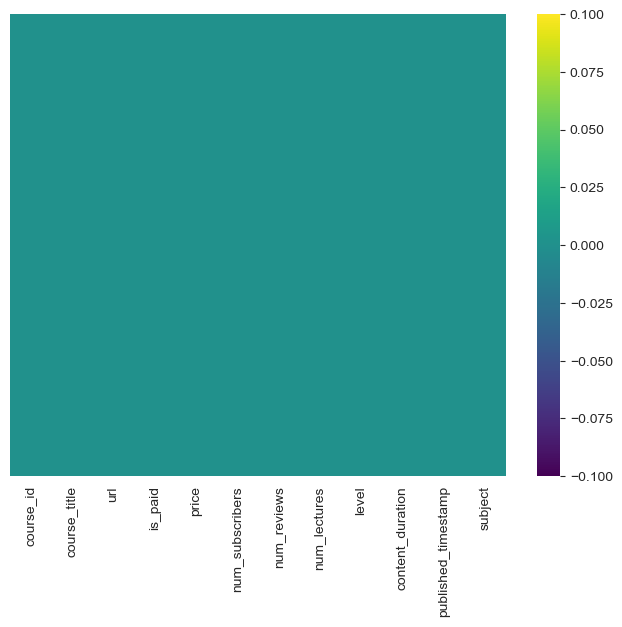

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar=True, cmap='viridis')
plt.show()

# DATA ANALYSIS 

# COURSES NUMBER PER SUBJECT


**BQ1** Our e-learning platform aims to optimize course offerings to enhance user engagement and revenue generation. However, we lack insights into the distribution of courses across different subjects. We need to understand which subjects have the highest and lowest number of courses to identify areas with potential for further course development or expansion, allocate resources effectively to promote and market courses in underrepresented subjects, tailor our marketing strategies to target specific subject areas with high demand, determine the effectiveness of existing courses in attracting learners and meeting their needs, and identify trends and patterns in course popularity across subjects to inform future content creation and investment decisions.

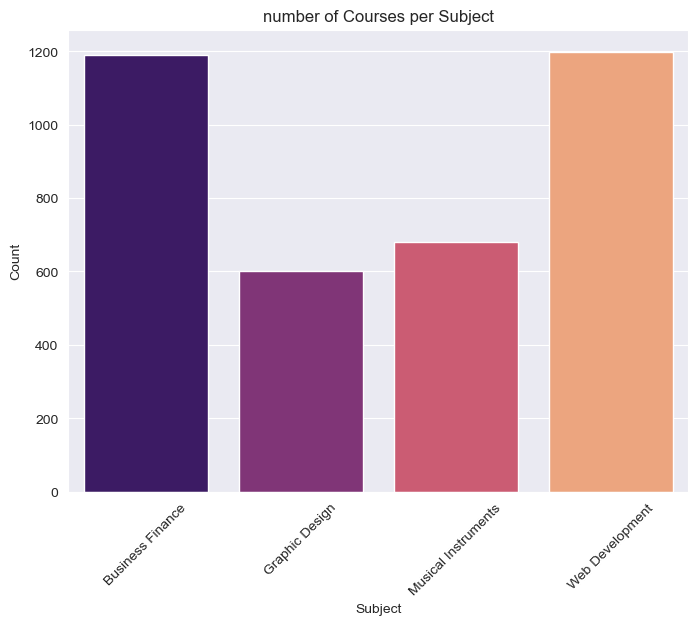

In [28]:
pio.renderers.default = 'notebook_connected'
# Convert 'subject' column to categorical data
df['subject'] = df['subject'].astype('category')

# Plotting the countplot
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='subject', palette='magma')
plt.title("number of Courses per Subject")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**RECOMMENDATION**
  1. Subject expanison: The subject graphic design and muscial instrument with a low number courses and consider expanding course offerings in these areas to cater to a broader audience.
  
  2. Resource allocation: Allocate resources effectively to promote and market courses. Invest money in targeted marketing campaigns to raise the course sales by attracting the learnes.

# NUMBER OF SUBCRIBERS PER SUBJECT

**BQ2** In order to maximize course offers and revenue creation, our e-learning platform must comprehend how subscribers are distributed among various disciplines. However, we have trouble successfully allocating resources, setting priorities for course creation, and adjusting marketing tactics to target particular topic areas if we don't know which subjects draw in the most members and why. As a result, the main focus of the business challenge is to determine what aspects of each subject influence subscriber engagement, maximize subscriber acquisition and retention, and use this knowledge to improve the platform's overall effectiveness and profitability.

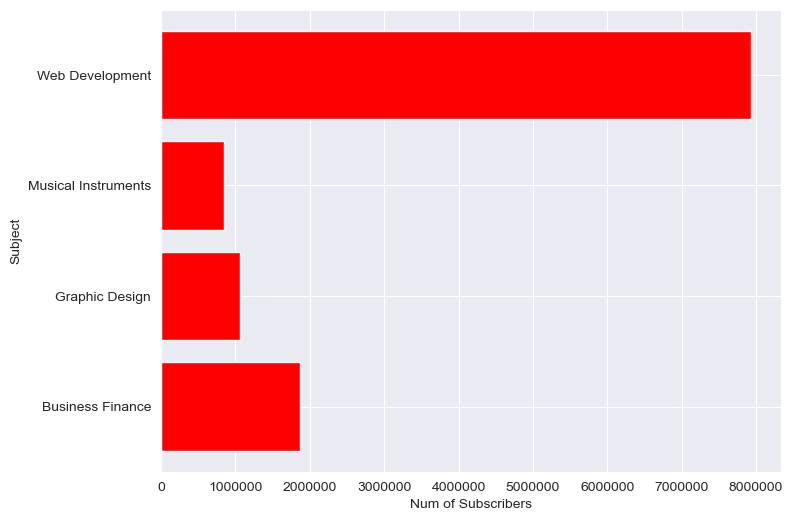

In [29]:
pio.renderers.default = 'notebook_connected'
# Grouping the DataFrame by 'subject' and summing the 'num_subscribers' column
s = df.groupby('subject')['num_subscribers'].sum()

# Creating a horizontal bar plot
plt.figure(figsize=(8,6))
plt.barh(y=s.index,width=s.values,color='r')
plt.xlabel('Num of Subscribers')
plt.ylabel('Subject')
plt.ticklabel_format(axis='x', style='plain')
plt.show()


### Although the quantity of courses offered in the Business and Finance category is comparable to that in the Web Development category, the number of subscribers in Business and Finance is only 23% of what is observed in Web Development. This discrepancy suggest that, on average, the ratio of subscribers per course in Web Development greatly surpasses that of Business and Finance.

In [30]:
wr = round((df[df['subject']=="Web Development"]['num_subscribers'].sum()/df[df['subject']=='Web Development']['course_title'].count()))
br = round((df[df['subject']=="Business Finance"]['num_subscribers'].sum()/df[df['subject']=='Business Finance']['course_title'].count()))

def gcd(a,b):
    """Greatest Common Divisor"""
    while b!= 0:
        r = a%b
        a,b = b,r
    return a

a= int(wr/gcd(wr,br))
b= int(br/gcd(wr,br))

print("Subcribers per course ratio for Web development and Business Finance")
print(a, ':', b)

Subcribers per course ratio for Web development and Business Finance
6620 : 1569


**RECOMMENDATION**
 1. Subject Prioritization: The web development subject with the highest number of subscribers and prioritize course creation and marketing efforts in these areas. Focus on developing high-quality courses that cater to the interests and needs of subscribers.
 
 2. Subscriber Engagement Analysis: Analyze factors influencing subscriber engagement within each subject, such as course content, instructer expertise, and user experience.

# UDEMY GROWTH

**BQ3** Udemy must determine the main forces behind its growth and the best places to expand in order to maintain and speed it up. However, Udemy has difficulties in preserving its competitive advantage and maximizing market share without a thorough grasp of the elements driving its development trajectory as well as possible areas for innovation and improvement. The analysis of Udemy's growth patterns, the identification of growth prospects in both new and existing markets, and the development of strategies to take advantage of these opportunities are therefore key to the business challenge in order to promote scalable and sustainable growth.

In [31]:
pio.renderers.default = 'notebook_connected'

In [32]:
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [33]:
sub = df['subject'].unique()
growth = df[['published_timestamp','subject']]
growth = growth.sort_values('published_timestamp')
time_series = growth['published_timestamp'].value_counts().reset_index()
time_series.columns =["Date", 'Counts']
time_series['Cummulative'] = time_series['Counts'].cumsum()
dummies = pd.get_dummies(growth['subject'])

growth = growth.join(dummies)
growth['cum_busfin'] = growth["Business Finance"].cumsum()
growth['cum_grdes'] = growth["Graphic Design"].cumsum()
growth['cum_music'] = growth["Musical Instruments"].cumsum()
growth['cum_webdev'] = growth["Web Development"].cumsum()
growth_melt= growth.melt(id_vars='published_timestamp',value_vars=['cum_busfin','cum_grdes','cum_music','cum_webdev'])

In [34]:
pio.renderers.default = 'notebook_connected'
fig = make_subplots(rows=1, cols=1)
fig.append_trace(go.Scatter
                (x=growth['published_timestamp'],y=growth['cum_busfin'],
                name = 'Business Finance', line=dict(color="#7deb34",width=5)), row=1,col=1)
fig.append_trace(go.Scatter
                (x=growth['published_timestamp'],y=growth['cum_grdes'],
                name = 'Graphic Design', line=dict(color="#345feb",width=3)), row=1,col=1)
fig.append_trace(go.Scatter
                (x=growth['published_timestamp'],y=growth['cum_music'],
                name = 'Musical Instrument', line=dict(color="#e8eb34",width=3)), row=1,col=1)
fig.append_trace(go.Scatter
                (x=growth['published_timestamp'],y=growth['cum_webdev'],
                name = 'Web Development', line=dict(color="#eb5f34",width=5)), row=1,col=1)

fig['layout'].update(height=500, width=1000, title="Number of Courses Growth per Subject")
fig.show()

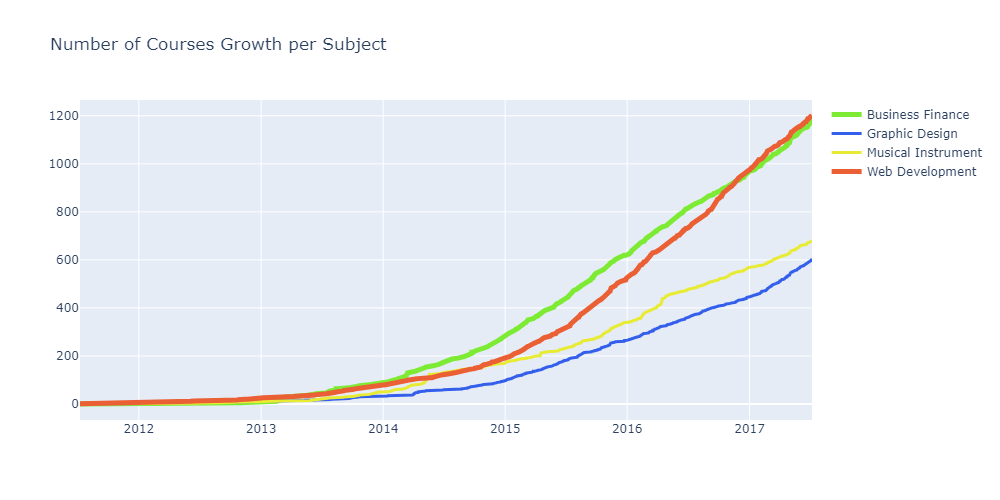

In [35]:
milestones = pd.DataFrame({'published_timestamp' : ['2010-01-01', '2011-10-01', '2012-12-01', '2013-04-01','2014-01-01'],
                          'milestones' : ['Founded', 'Series A funding', 'Series B funding', 'ios App Launched', 'Android App Launch']})
milestones['published_timestamp'] = pd.to_datetime(milestones['published_timestamp'], utc=True)
milestones.head()

,published_timestamp,milestones
0,2010-01-01 00:00:00+00:00,Founded
1,2011-10-01 00:00:00+00:00,Series A funding
2,2012-12-01 00:00:00+00:00,Series B funding
3,2013-04-01 00:00:00+00:00,ios App Launched
4,2014-01-01 00:00:00+00:00,Android App Launch


In [36]:
growth_merged = pd.merge(growth, milestones, on='published_timestamp', how='outer')

def milestone_values(col):
    milestone = col[0]
    if milestone =='Founded' or milestone=='Series A funding' or milestone == 'Series B funding' or milestone=='ios App launched' or milestone == "Android App launched" :
        return 0
    
growth_merged['milestone_value'] = growth_merged[['milestones']].apply(milestone_values, axis=1)    

## Considering these milestones, we can observe the progression of course growth following each of these events.

In [37]:
pio.renderers.default = 'notebook_connected'
fig = make_subplots(rows=1, cols=1)
fig.append_trace(go.Scatter
                (x=growth_merged['published_timestamp'], y=growth_merged['cum_busfin'],
                name='Business Finance', line=dict(color='#345feb', width=5)),row=1,col=1)
fig.append_trace(go.Scatter
                (x=growth_merged['published_timestamp'], y=growth_merged['cum_grdes'],
                name='Graphic Design', line=dict(color='#7deb34', width=3)),row=1,col=1)
fig.append_trace(go.Scatter
                (x=growth_merged['published_timestamp'], y=growth_merged['cum_music'],
                name='Musical Instrument', line=dict(color='#eb5f34', width=3)),row=1,col=1)
fig.append_trace(go.Scatter
                (x=growth_merged['published_timestamp'], y=growth_merged['cum_webdev'],
                name='Web Development', line=dict(color='#e8eb34', width=5)),row=1,col=1)
fig.append_trace(go.Scatter
                (x=growth_merged[growth_merged['milestones']=='Founded']['published_timestamp'],
                 y=growth_merged[growth_merged['milestones']=='Founded']['milestone_value'],
                mode='markers',
                name='Founded',
                hovertext="Udemy was founded in 2010",
                marker_size=10,),row=1, col=1)
fig.append_trace(go.Scatter
                (x=growth_merged[growth_merged['milestones']=='Series A funding']['published_timestamp'],
                 y=growth_merged[growth_merged['milestones']=='Series A funding']['milestone_value'],
                mode='markers',
                name='Series A funding',
                hovertext="Udemy received Series A funding",
                marker_size=10,),row=1, col=1)
fig.append_trace(go.Scatter
                (x=growth_merged[growth_merged['milestones']=='Series B funding']['published_timestamp'],
                 y=growth_merged[growth_merged['milestones']=='Series B funding']['milestone_value'],
                mode='markers',
                name='Series B funding',
                hovertext="Udemy received Series B funding",
                marker_size=10,),row=1, col=1)
fig.append_trace(go.Scatter
                (x=growth_merged[growth_merged['milestones']=='ios App launched']['published_timestamp'],
                 y=growth_merged[growth_merged['milestones']=='ios App launched']['milestone_value'],
                mode='markers',
                name='ios App launched',
                hovertext= 'ios app launched to make learning more portable for ios users',
                marker_size=10,),row=1, col=1)
fig.append_trace(go.Scatter
                (x=growth_merged[growth_merged['milestones']=='Android App launched']['published_timestamp'],
                 y=growth_merged[growth_merged['milestones']=='Android App launched']['milestone_value'],
                mode='markers',
                name='Android App launched',
                hovertext= 'ios app launched to make learning more portable for Android users',
                marker_size=10,),row=1, col=1)


fig['layout'].update(height=500, width=1000, title='Number of Courses Growth per Subject and Udemy Milestones Event')
fig.show()

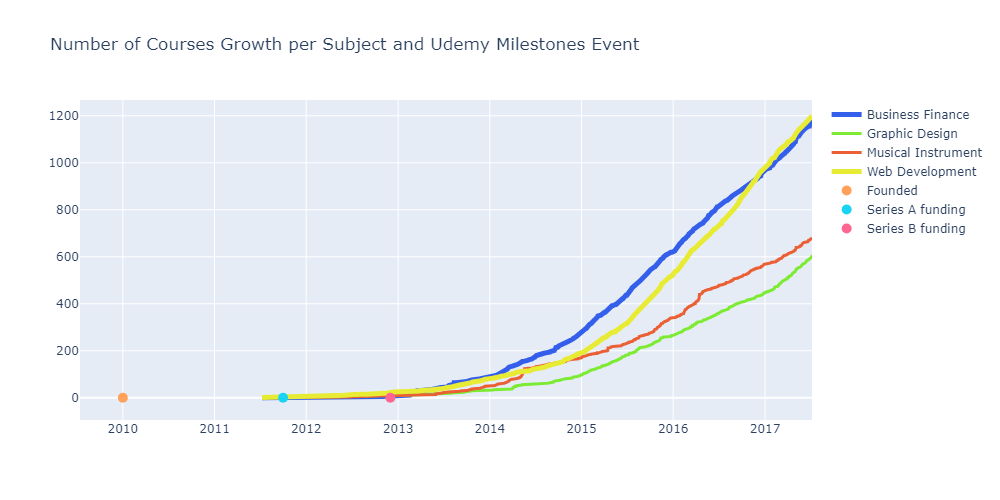

**RECOMMENDATION**

 1. Growth Analysis: Udemy's growth was substantial with the release of its mobile app in 2013.This makes sense because mobile applications are easier to use and more convenient for learning, and they created a lot of buzz when they were first released. As a result, this spike in user activity brought instructors and students to the site, which helped it grow.

 2. Strategic Partnerships: Explore strategic partnerships and collaborations with industry leaders, educational institutions, and content creators to accelerate growth and expand reach.

# How big of a role does price plays?

**BQ4** To optimize revenue generation and enhance market competitiveness, our e-learning platform needs to understand the impact of pricing strategies on course sales and profitability. However, without a clear understanding of how pricing influences user behaviour and purchasig decisions,It can be difficult to determine the best prices to balance course accessibility and client happiness with revenue maximization. Therefore, the business problem revolves around determining the significance of pricing in driving course sales and profitability, and developing effective pricing strategies to achieve our revenue objectives while metting customer needs.

In [38]:
pio.renderers.default = 'notebook_connected'
split = df['is_paid'].value_counts().reset_index()
split.columns = ['Is Paid', "Counts"]
fig = px.pie(split,names="Is Paid", values="Counts", width=500)
fig['layout'].update(title='Paid/Free Course Pie Chart')
fig.show()

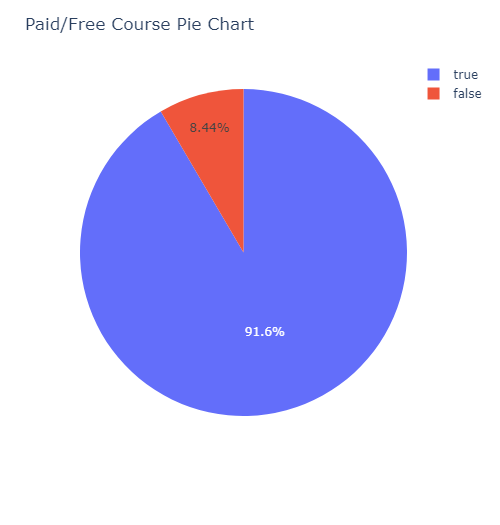

### while the majority of courses are offered as paid options, the question arises: Does the pricing strategy significantly impact subscriber acquistion and retention?

<Axes: >

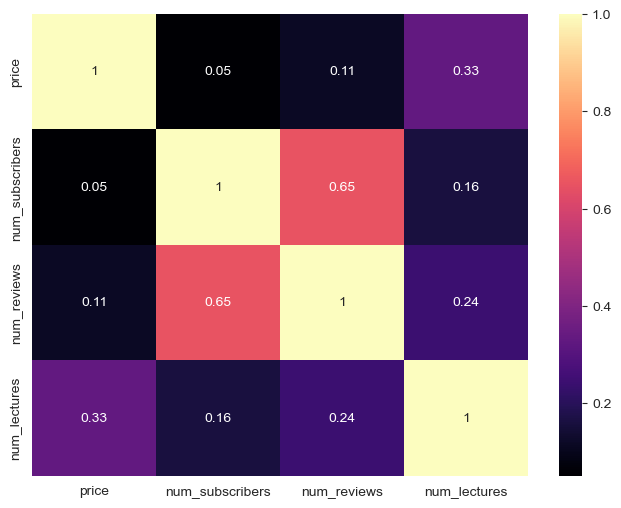

In [39]:
paycorr =df[['price', 'num_subscribers', 'num_reviews', 'num_lectures',]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(paycorr, cmap='magma', annot=True)

This suggests that the majority of users may not be deterred by higher prices as long as the course content aligns with their expectations. Additionally, Udemy's provision of a 30-day refund policy further supports this observation, as users have the flexibility to request a refund if they are dissatisfied with their purchase.

**RECOMMENDATION**
  1. Market Segmentation: Segment the customer base based in price sensitivity, demographics, and purchasing behavior to tailor pricing strategies to specific customer segments.
  
  2. Dynamic Pricing: Put in place dynamic pricing algorithms that, in response to variables like user behavior, competitor pricing, and demand, instantly modify course rates.

# Most Popular and Engaging Course

**BQ5** To optimize user engagement and revenue generation, our e-learning platform needs to identify and prioritize the most popular and engaging courses. However, without a clear understanding of which courses are resonating most with our users and driving high levels of engagement, we face challenges in allocating resources eddectively and maximizing user satisfaction. Therefore, the business problem revolves around identifying the key factors that contribute to a course's popularity and engagement, and developing strategies to promote and enhance the visibility of these courses to attract more users and drive revenue growth.

In [40]:
pio.renderers.default = 'notebook_connected'
idx = pd.IndexSlice
popular = df.loc[idx[df['num_subscribers'].sort_values(ascending=False).index]][['course_title','num_subscribers','subject']]
mostpop = popular.head(10)
engage = df.loc[idx[df['num_reviews'].sort_values(ascending=False).index]][['course_title','num_reviews','subject']]
mosten=engage.head(10)
fig = make_subplots(rows=2, cols=1, subplot_titles=("Most Popular Courses","Most Engaging Courses"))
fig.append_trace(go.Bar(x=mostpop['num_subscribers'], y=mostpop['course_title'],
                       orientation='h',showlegend=False), row=1, col=1)
fig.append_trace(go.Bar(x=mosten['num_reviews'], y=mosten['course_title'],
                       orientation='h',showlegend=False), row=2, col=1)
fig['layout'].update(height=700, width=800)
fig.show()

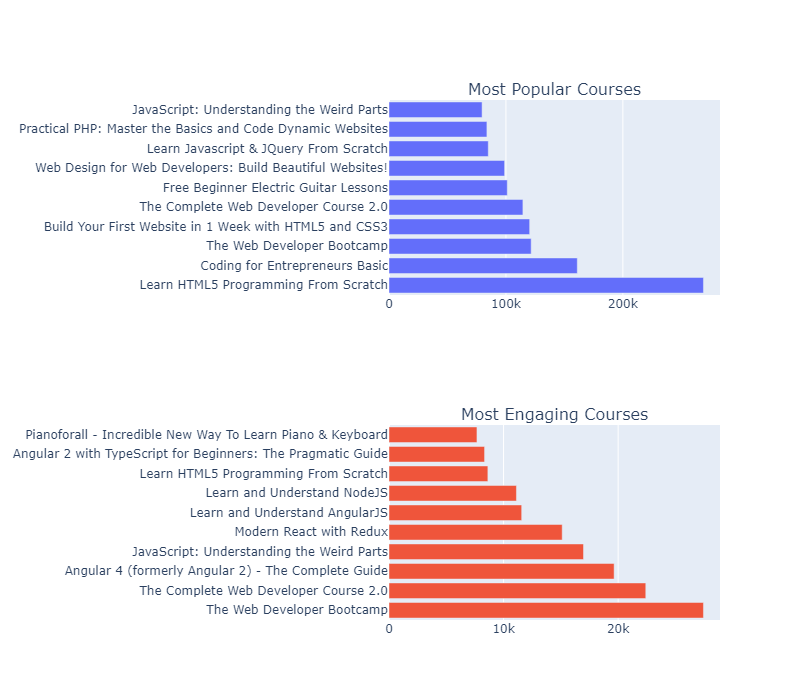

Pianoforall, the sole Musical course among the Top 5 Most Profitable courses, also stands out in the Top 10 Most Engaging courses as the only non-Web Development course.

**RECOMMENDATION**
 1. Content Personalization: Implement personalized recommendations and course suggestions based on user preferences, past behavior, and demographics.
 
 2. Enhance Course Visibility: Optimize course discovery and visibility within the platform by improving search algorithms, categorization, and recommendation systems.

# Course Levels Importance


**BQ6** To optimize user experience and satisfaction, our e-learning platform needs to understand the significance of course levels in driving learner engagement and success. However, without a clear understanding of how different course levels impact user behavior and learning outcomes, we face challenges in designing and curating course offerings that cater to the diverse needs and skill levels of our users. Therefore, the business problem revolves around identifying the importance of course levels in influencing user engagement, retention, and skill development, and developing strategies to effectively leverage this information to enhance the effectiveness and appeal of our course offerings.

In [41]:
pio.renderers.default = 'notebook_connected'
df_level = df[['level', 'num_subscribers', 'course_title']]
subs_level = df_level.groupby('level').sum().reset_index()
course_level = df_level.groupby('level').count().reset_index()

fig = make_subplots(rows=2 ,cols=1, subplot_titles=('Levels v Subscribers', 'Levels v Number of Courses'))
fig.append_trace(go.Bar(x=subs_level['num_subscribers'], y=subs_level['level'],
                       orientation='h', 
                       showlegend=False), row=1, col=1)
fig.append_trace(go.Bar(x=course_level['course_title'], y=course_level['level'],
                       orientation='h', 
                       showlegend=False), row=2, col=1)
fig['layout'].update(height=700, width=800)
fig.show()

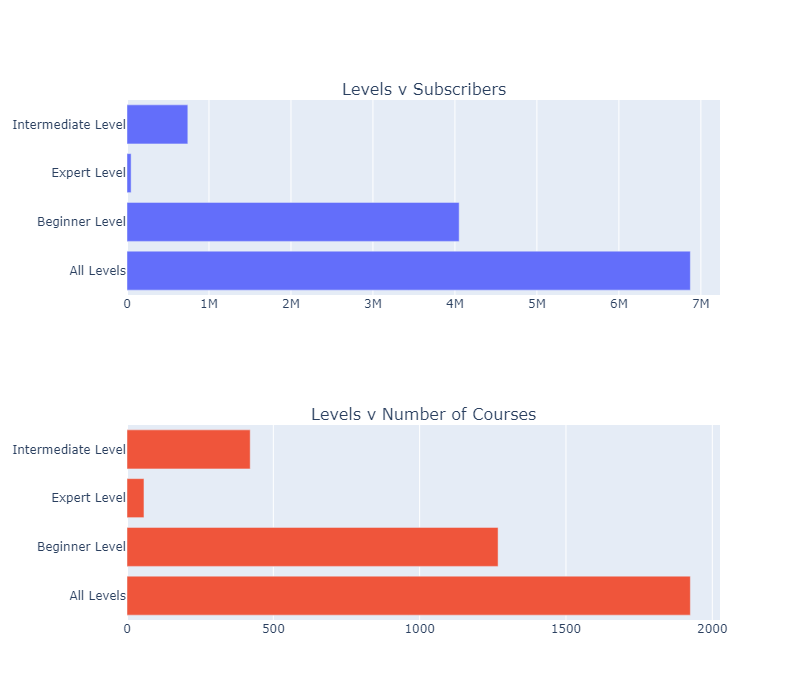

### The majority of courses are accessible to individuals of all skill levels, followed by Beginner, Intermediate, and Expert levels. Therefore, the plot depicting levels versus Subscribers aligns with this distribution. However, to accurately assess the impact of course levels on subscriber engagement, it is necessary to normalize the number of subscribers by the number of courses available per level

In [42]:
pio.renderers.default = 'notebook_connected'
norm_level = pd.DataFrame(subs_level['num_subscribers']/course_level['course_title'])
norm_level = pd.concat([subs_level['level'], norm_level], axis=1)
norm_level.columns = ['level', 'subs per course']
fig = px.bar(data_frame=norm_level, x='subs per course', y='level', color='level', title ='Subs per Course Vs Level')
fig.show()

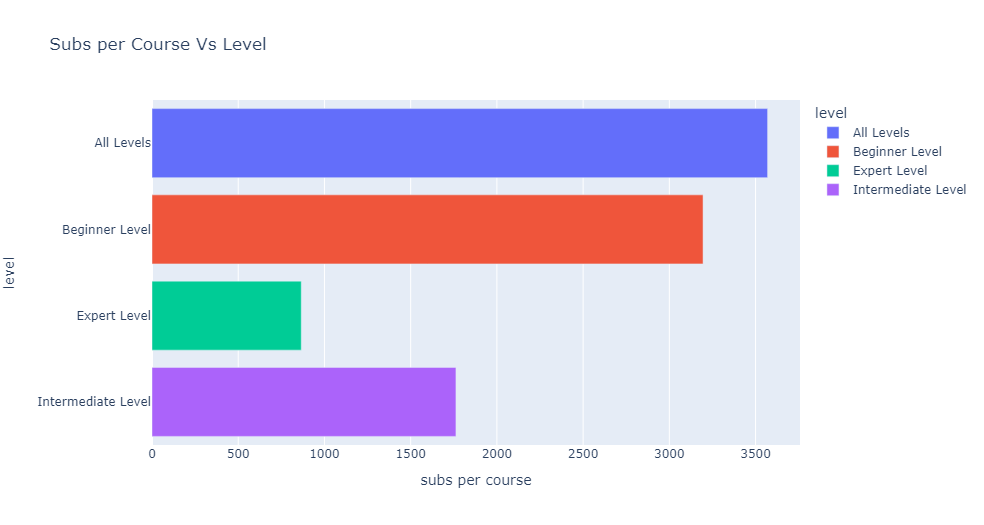

**RECOMMENDATION**
 1. Skills Assessment and Progress Tracking: Provide users with tools and resources to assess their current skill level, track their progress, and set learning goals.
 
 2. Adaptive Learning Technologies: Explore the use of adaptive learning technologies and intelligent tutoring systems to dynamically adjust course content and difficulty based on user performance and feeback.

# CONCLUSION

**In order to boost our upcoming quartely profits, we must:**

1. More free courses should be converted to premium ones.
2. Examine the course material for courses on musical isntruments, since the analysis's findings indicate that these courses are underperforming in terms of ratings and money generating.
3. Courses in graphic design should also be examined because they yield far less money than courses in business finance and web development.
4. Increase the number of courses at the Expert and Intermediate levels. There are now 422 intermediate level courses and 58 expert level courses available.

# DATASET SOURCE LINK

https://www.kaggle.com/datasets/andrewmvd/udemy-courses